In [1]:
import timm 
from pathlib import Path
from fastai.vision.all import *

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## For training

## Private images

In [11]:
###
tst_files = get_image_files('private_images').sorted()
###


In [12]:
print(len(tst_files))

22308


In [10]:
tst_files = get_image_files('test_images').sorted()
print(len(tst_files))

11148


In [2]:
trn_path = Path('big_test')
resize_images('test_images', dest=trn_path, max_size=1000, recurse=True)

In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('./big_train')
arch = 'vit_large_patch16_224'
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(1000), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64//8)
learn = vision_learner(dls, 
                    arch, 
                    path='./tobekilled', 
                    cbs=[EarlyStoppingCallback(monitor='error_rate', min_delta=0.001, patience=3), 
                        SaveModelCallback(monitor='error_rate', min_delta=0.001),
                        GradientAccumulation(64)],
                    metrics=error_rate).to_fp16() 
learn.fine_tune(24, 0.01)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


epoch,train_loss,valid_loss,error_rate,time
0,1.184366,0.867796,0.266786,15:52


Better model found at epoch 0 with error_rate value: 0.2667858302593231.


epoch,train_loss,valid_loss,error_rate,time
0,0.699461,0.565265,0.171601,21:28
1,0.571557,0.568793,0.175511,21:29
2,0.549925,0.565224,0.171936,21:29
3,0.651324,0.606503,0.178416,21:28


Better model found at epoch 0 with error_rate value: 0.17160093784332275.
No improvement since epoch 0: early stopping


## Multiple ensemble

In [1]:
import timm 
# from fastkaggle import *
from pathlib import Path
# path = Path(r'C:\Users\user\Desktop\AI_CUP_2022-Crop_Image_Recognition')
from fastai.vision.all import *
tta_res = []
loc = torch.load('tobekilled/models/model.pth') 
trn_path = Path('md_train')
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=(224), min_scale=0.75))
learn = vision_learner(dls,'swin_large_patch4_window7_224',metrics=error_rate)
learn.load_state_dict(loc)
tst_files = get_image_files('md_test').sorted()
tst_dl = learn.dls.test_dl(tst_files)
tta_res.append(learn.tta(dl=tst_dl))

torch.cuda.empty_cache()

loc = torch.load('tobekilled/models/11.pth') 
trn_path = Path('md_train')
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=(224), min_scale=0.75))
learn = vision_learner(dls,'swin_large_patch4_window7_224',metrics=error_rate)
learn.load_state_dict(loc)
tst_files = get_image_files('md_test').sorted()
tst_dl = learn.dls.test_dl(tst_files)
tta_res.append(learn.tta(dl=tst_dl))

torch.cuda.empty_cache()

tta_prs = first(zip(*tta_res))
avg_pr = torch.stack(tta_prs).mean(0)
print(avg_pr.shape)
idxs = avg_pr.argmax(dim=1)
vocab = np.array(dls.vocab)
ss = pd.read_csv('./submission_example_public.csv')
ss['label'] = vocab[idxs]
ss.to_csv('subm.csv', index=False)


/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([11148, 33])


##

In [1]:
import timm 
# from fastkaggle import *
from pathlib import Path
# path = Path(r'C:\Users\user\Desktop\AI_CUP_2022-Crop_Image_Recognition')
from fastai.vision.all import *
tta_res = []
loc = torch.load('tobekilled/models/model.pth') 
trn_path = Path('md_train')
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=(224), min_scale=0.75))
learn = vision_learner(dls,'swin_large_patch4_window7_224',metrics=error_rate)
learn.load_state_dict(loc)
tst_files = get_image_files('md_test').sorted()
tst_dl = learn.dls.test_dl(tst_files)
tta_res.append(learn.tta(dl=tst_dl))
tta_prs = first(zip(*tta_res))
avg_pr = torch.stack(tta_prs).mean(0)
print(avg_pr.shape)
idxs = avg_pr.argmax(dim=1)
vocab = np.array(dls.vocab)
ss = pd.read_csv('./submission_example_public.csv')
ss['label'] = vocab[idxs]
ss.to_csv('subm.csv', index=False)


/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([11148, 33])


## swin_s3_small_224

In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('./md_train')
arch = 'swin_s3_small_224'
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64//4)
learn = vision_learner(dls, 
                    arch, 
                    path='./tobekilled', 
                    cbs=[
                        SaveModelCallback(monitor='error_rate', min_delta=0.001),
                        GradientAccumulation(64)],
                    metrics=error_rate).to_fp16() 
learn.fine_tune(96, 0.01)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


epoch,train_loss,valid_loss,error_rate,time
0,1.585199,1.189311,0.356943,07:02


Better model found at epoch 0 with error_rate value: 0.35694336891174316.


epoch,train_loss,valid_loss,error_rate,time
0,0.988701,0.769306,0.231706,08:38
1,0.897046,0.672621,0.203664,08:33
2,0.734919,0.613658,0.188806,08:35
3,0.662455,0.593410,0.179533,08:35
4,0.700110,0.567720,0.172495,08:35
5,0.547273,0.557419,0.166015,08:36
6,0.607647,0.539682,0.163781,08:35
7,0.529740,0.527640,0.155960,08:35
8,0.553226,0.521951,0.154508,08:35
9,0.506812,0.507953,0.151268,08:34


Better model found at epoch 0 with error_rate value: 0.2317059487104416.
Better model found at epoch 1 with error_rate value: 0.2036643922328949.
Better model found at epoch 2 with error_rate value: 0.1888057142496109.
Better model found at epoch 3 with error_rate value: 0.17953301966190338.
Better model found at epoch 4 with error_rate value: 0.17249469459056854.
Better model found at epoch 5 with error_rate value: 0.16601496934890747.
Better model found at epoch 6 with error_rate value: 0.1637805849313736.
Better model found at epoch 7 with error_rate value: 0.15596023201942444.
Better model found at epoch 8 with error_rate value: 0.15450787544250488.
Better model found at epoch 9 with error_rate value: 0.15126802027225494.
Better model found at epoch 13 with error_rate value: 0.1489219069480896.
Better model found at epoch 15 with error_rate value: 0.14333593845367432.
Better model found at epoch 36 with error_rate value: 0.14110155403614044.
Better model found at epoch 45 with erro

KeyboardInterrupt: 

## swin_large_patch4_window7_224, train_size=640, epoch=96

In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('./md_train')
arch = 'swin_large_patch4_window7_224'
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64//8)
learn = vision_learner(dls, 
                    arch, 
                    path='./tobekilled', 
                    cbs=[
                        SaveModelCallback(monitor='error_rate', min_delta=0.001),
                        GradientAccumulation(64)],
                    metrics=error_rate).to_fp16() 
learn.fine_tune(96, 0.01)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


epoch,train_loss,valid_loss,error_rate,time
0,1.282374,0.859803,0.261870,11:29


Better model found at epoch 0 with error_rate value: 0.2618701756000519.


epoch,train_loss,valid_loss,error_rate,time
0,0.763228,0.585092,0.178863,15:26
1,0.697821,0.538091,0.164898,15:26
2,0.535155,0.505390,0.156854,15:22
3,0.492298,0.473962,0.146464,15:21
4,0.549151,0.462362,0.142554,15:37
5,0.461419,0.455999,0.137638,15:30
6,0.489073,0.471100,0.144341,15:12
7,0.421433,0.452188,0.135516,15:25
8,0.461627,0.473062,0.137415,15:40
9,0.355143,0.459463,0.131941,15:42


Better model found at epoch 0 with error_rate value: 0.17886269092559814.
Better model found at epoch 1 with error_rate value: 0.16489776968955994.
Better model found at epoch 2 with error_rate value: 0.15685398876667023.
Better model found at epoch 3 with error_rate value: 0.14646407961845398.
Better model found at epoch 4 with error_rate value: 0.14255391061306.
Better model found at epoch 5 with error_rate value: 0.13763825595378876.
Better model found at epoch 7 with error_rate value: 0.13551558554172516.
Better model found at epoch 9 with error_rate value: 0.131940558552742.
Better model found at epoch 10 with error_rate value: 0.12713663280010223.
Better model found at epoch 12 with error_rate value: 0.12412021309137344.
Better model found at epoch 59 with error_rate value: 0.11953971534967422.
Better model found at epoch 66 with error_rate value: 0.11730533093214035.
Better model found at epoch 76 with error_rate value: 0.11629985272884369.
Better model found at epoch 82 with er

## swin_large_patch4_window7_224, train_size=640, epoch=48, 966m 38.9s

In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('./md_train')
arch = 'swin_large_patch4_window7_224'
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64//16)
learn = vision_learner(dls, 
                    arch, 
                    path='./tobekilled', 
                    cbs=[
                        SaveModelCallback(monitor='error_rate', min_delta=0.001),
                        GradientAccumulation(64)],
                    metrics=error_rate).to_fp16() 
learn.fine_tune(48, 0.01)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


epoch,train_loss,valid_loss,error_rate,time
0,1.460312,0.986182,0.301195,13:59


Better model found at epoch 0 with error_rate value: 0.3011953830718994.


epoch,train_loss,valid_loss,error_rate,time
0,1.172547,0.711157,0.214054,19:51
1,0.739781,0.621028,0.186571,19:49
2,0.775437,0.590854,0.180762,19:51
3,0.653955,0.547704,0.165792,19:50
4,0.884763,0.558046,0.165792,19:49
5,0.643017,0.524720,0.157301,19:50
6,0.698929,0.526653,0.154955,19:48
7,0.558876,0.525911,0.155402,19:50
8,0.730464,0.482756,0.144341,19:50
9,0.624644,0.554364,0.155066,19:49


Better model found at epoch 0 with error_rate value: 0.21405430138111115.
Better model found at epoch 1 with error_rate value: 0.18657132983207703.
Better model found at epoch 2 with error_rate value: 0.1807619333267212.
Better model found at epoch 3 with error_rate value: 0.16579152643680573.
Better model found at epoch 5 with error_rate value: 0.15730085968971252.
Better model found at epoch 6 with error_rate value: 0.15495474636554718.
Better model found at epoch 8 with error_rate value: 0.14434140920639038.
Better model found at epoch 10 with error_rate value: 0.14244218170642853.
Better model found at epoch 12 with error_rate value: 0.13987264037132263.
Better model found at epoch 13 with error_rate value: 0.13316947221755981.
Better model found at epoch 18 with error_rate value: 0.13115853071212769.
Better model found at epoch 22 with error_rate value: 0.12881241738796234.
Better model found at epoch 23 with error_rate value: 0.12747178971767426.
Better model found at epoch 25 wi

## vit_large_patch_16_224, train_size=640, 477m 1.3s

In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('./md_train')
arch = 'vit_large_patch16_224'
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64//8)
learn = vision_learner(dls, 
                    arch, 
                    path='./tobekilled', 
                    cbs=[
                        SaveModelCallback(monitor='error_rate', min_delta=0.001),
                        GradientAccumulation(64)],
                    metrics=error_rate).to_fp16() 
learn.fine_tune(24, 0.01)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


epoch,train_loss,valid_loss,error_rate,time
0,1.185054,0.904920,0.276841,14:02


Better model found at epoch 0 with error_rate value: 0.27684056758880615.


epoch,train_loss,valid_loss,error_rate,time
0,0.762339,0.608509,0.182326,19:44
1,0.624021,0.579248,0.175623,19:47
2,0.561227,0.570046,0.171154,19:43
3,0.576835,0.592604,0.178974,19:43
4,0.707944,0.589526,0.171042,19:21
5,0.536196,0.609726,0.175288,19:21
6,0.553915,0.636365,0.177187,19:47
7,0.421551,0.633124,0.174394,19:53
8,0.444027,0.652701,0.166127,19:53
9,0.374782,0.670213,0.169925,19:54


Better model found at epoch 0 with error_rate value: 0.18232600390911102.
Better model found at epoch 1 with error_rate value: 0.1756228357553482.
Better model found at epoch 2 with error_rate value: 0.17115406692028046.
Better model found at epoch 8 with error_rate value: 0.16612668335437775.
Better model found at epoch 11 with error_rate value: 0.1633336991071701.
Better model found at epoch 14 with error_rate value: 0.1590883731842041.
Better model found at epoch 15 with error_rate value: 0.15327896177768707.
Better model found at epoch 17 with error_rate value: 0.14836330711841583.
Better model found at epoch 18 with error_rate value: 0.1455703228712082.
Better model found at epoch 19 with error_rate value: 0.14266562461853027.
Better model found at epoch 20 with error_rate value: 0.14121326804161072.
Better model found at epoch 21 with error_rate value: 0.13842028379440308.


KeyboardInterrupt: 

In [4]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('')
arch = 'convnext_small_in22k' 
dls = ImageDataLoaders.from_folder(trn_path, seed=42, path='./tobekilled', valid_pct=0.1, item_tfms=Resize(256), batch_tfms=aug_transforms(size=224, min_scale=0.75))
learn = vision_learner(dls, arch, cbs=[EarlyStoppingCallback(monitor='error_rate', min_delta=0.001, patience=3), SaveModelCallback(monitor='error_rate', min_delta=0.001)], metrics=error_rate).to_fp16() 
learn.fine_tune(12, 0.01)

epoch,train_loss,valid_loss,error_rate,time
0,1.354725,1.084523,0.330801,03:07


epoch,train_loss,valid_loss,error_rate,time
0,0.986263,0.795906,0.243995,04:12
1,0.854939,0.750489,0.229695,04:10
2,0.830969,0.701624,0.212155,04:11
3,0.694858,0.668835,0.198637,04:10
4,0.629229,0.625013,0.185678,04:12
5,0.543548,0.626085,0.185342,04:12
6,0.481292,0.591977,0.176740,04:12
7,0.389047,0.606841,0.169813,04:12
8,0.293730,0.626237,0.165903,04:12
9,0.238474,0.654501,0.166350,04:11


In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('./md_train_2')
arch = 'vit_small_patch16_224'
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=224, min_scale=0.75))
learn = vision_learner(dls, arch, path='./tmp', cbs=[EarlyStoppingCallback(monitor='error_rate', min_delta=0.001, patience=3), SaveModelCallback(monitor='error_rate', min_delta=0.001)], metrics=error_rate).to_fp16() 
learn.fine_tune(14, 0.01)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


epoch,train_loss,valid_loss,error_rate,time
0,1.468928,1.090071,0.337121,01:37


Better model found at epoch 0 with error_rate value: 0.33712121844291687.


epoch,train_loss,valid_loss,error_rate,time
0,1.005269,0.804588,0.244129,01:47
1,0.909708,0.766157,0.237500,01:49
2,0.843975,0.723945,0.222538,01:47
3,0.761232,0.733152,0.222348,01:48
4,0.724008,0.695675,0.207197,01:48
5,0.643929,0.673643,0.203598,01:47
6,0.548836,0.647398,0.185417,01:49
7,0.478903,0.675049,0.193939,01:49
8,0.428752,0.628122,0.180871,01:49
9,0.352372,0.622181,0.174621,01:48


Better model found at epoch 0 with error_rate value: 0.24412879347801208.
Better model found at epoch 1 with error_rate value: 0.23749999701976776.
Better model found at epoch 2 with error_rate value: 0.22253787517547607.
Better model found at epoch 4 with error_rate value: 0.20719696581363678.
Better model found at epoch 5 with error_rate value: 0.2035984843969345.
Better model found at epoch 6 with error_rate value: 0.18541666865348816.
Better model found at epoch 8 with error_rate value: 0.18087121844291687.
Better model found at epoch 9 with error_rate value: 0.17462120950222015.
Better model found at epoch 10 with error_rate value: 0.1712121218442917.
Better model found at epoch 11 with error_rate value: 0.16856060922145844.


In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('./md_train_2')
arch = 'vit_small_patch16_224'
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=224, min_scale=0.75))
learn = vision_learner(dls, arch, path='./tmp', cbs=[EarlyStoppingCallback(monitor='error_rate', min_delta=0.001, patience=3), SaveModelCallback(monitor='error_rate', min_delta=0.001)], metrics=error_rate).to_fp16() 
learn.fine_tune(24, 0.002)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


epoch,train_loss,valid_loss,error_rate,time
0,1.560457,1.153839,0.342992,01:37


Better model found at epoch 0 with error_rate value: 0.3429924249649048.


epoch,train_loss,valid_loss,error_rate,time
0,1.217543,0.935677,0.282765,01:50
1,1.083158,0.847229,0.256250,01:51
2,0.993540,0.790189,0.243182,01:51
3,0.932072,0.754294,0.232008,01:51
4,0.828391,0.720764,0.217424,01:50
5,0.823397,0.713194,0.212689,01:50
6,0.763239,0.684922,0.207386,01:50
7,0.710183,0.666425,0.202652,01:50
8,0.680742,0.648907,0.196023,01:49
9,0.649319,0.639785,0.190530,01:49


Better model found at epoch 0 with error_rate value: 0.28276515007019043.
Better model found at epoch 1 with error_rate value: 0.2562499940395355.
Better model found at epoch 2 with error_rate value: 0.24318182468414307.
Better model found at epoch 3 with error_rate value: 0.23200757801532745.
Better model found at epoch 4 with error_rate value: 0.21742424368858337.
Better model found at epoch 5 with error_rate value: 0.21268939971923828.
Better model found at epoch 6 with error_rate value: 0.20738635957241058.
Better model found at epoch 7 with error_rate value: 0.2026515156030655.
Better model found at epoch 8 with error_rate value: 0.19602273404598236.
Better model found at epoch 9 with error_rate value: 0.19053030014038086.
No improvement since epoch 9: early stopping


## swinv2_large_window12_192_22k

In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('md_train')
arch = 'swinv2_large_window12_192_22k'
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=192, min_scale=0.75), bs=64//4)
learn = vision_learner(dls, 
                    arch, 
                    path='tobekilled', 
                    cbs=[
                        SaveModelCallback(monitor='error_rate', min_delta=0.001),
                        GradientAccumulation(64)],
                    metrics=error_rate).to_fp16() 
learn.fine_tune(120, 0.01)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


epoch,train_loss,valid_loss,error_rate,time
0,1.180277,0.832354,0.254050,12:09


Better model found at epoch 0 with error_rate value: 0.2540498375892639.


epoch,train_loss,valid_loss,error_rate,time
0,0.683995,0.561480,0.170037,15:45
1,0.578331,0.517037,0.153279,15:43
2,0.553737,0.486392,0.145123,15:42
3,0.522443,0.468421,0.140655,15:40
4,0.438203,0.460245,0.135180,15:40
5,0.461928,0.451696,0.133728,15:41
6,0.395417,0.452509,0.129706,15:40
7,0.348068,0.463902,0.134957,15:39
8,0.312988,0.469886,0.128589,15:43
9,0.296041,0.492632,0.129818,15:40


Better model found at epoch 0 with error_rate value: 0.17003686726093292.
Better model found at epoch 1 with error_rate value: 0.15327896177768707.
Better model found at epoch 2 with error_rate value: 0.1451234519481659.
Better model found at epoch 3 with error_rate value: 0.14065466821193695.
Better model found at epoch 4 with error_rate value: 0.13518042862415314.
Better model found at epoch 5 with error_rate value: 0.13372807204723358.
Better model found at epoch 6 with error_rate value: 0.12970617413520813.
Better model found at epoch 8 with error_rate value: 0.1285889893770218.


KeyboardInterrupt: 

## swin_base_patch4_window7_224 2  swinv2_large_window12_192_22k

In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('md_train')
arch = 'swin_base_patch4_window7_224'
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64//2)
learn = vision_learner(dls, 
                    arch, 
                    path='tobekilled', 
                    cbs=[
                        SaveModelCallback(monitor='error_rate', min_delta=0.001),
                        GradientAccumulation(64)],
                    metrics=error_rate).to_fp16() 
learn.fine_tune(120, 0.02)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


epoch,train_loss,valid_loss,error_rate,time
0,1.249144,0.965361,0.288459,06:35


Better model found at epoch 0 with error_rate value: 0.2884593904018402.


epoch,train_loss,valid_loss,error_rate,time
0,0.752155,0.609443,0.186795,07:54
1,0.661280,0.557893,0.172160,07:53
2,0.607741,0.534000,0.162663,07:59
3,0.569574,0.492663,0.151603,07:56
4,0.503585,0.482259,0.147246,07:57
5,0.476619,0.494592,0.147246,07:57
6,0.440506,0.487015,0.144230,07:56
7,0.418769,0.474544,0.138867,07:57
8,0.430323,0.474705,0.138420,07:56
9,0.392961,0.496789,0.138532,07:57


Better model found at epoch 0 with error_rate value: 0.18679477274417877.
Better model found at epoch 1 with error_rate value: 0.17215953767299652.
Better model found at epoch 2 with error_rate value: 0.16266338527202606.
Better model found at epoch 3 with error_rate value: 0.15160317718982697.
Better model found at epoch 4 with error_rate value: 0.1472461223602295.
Better model found at epoch 6 with error_rate value: 0.1442296952009201.
Better model found at epoch 7 with error_rate value: 0.13886716961860657.
Better model found at epoch 10 with error_rate value: 0.13585074245929718.
Better model found at epoch 12 with error_rate value: 0.13372807204723358.


KeyboardInterrupt: 

## swin_base_patch4_window7_224 1

In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('md_train')
arch = 'swin_base_patch4_window7_224'
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64//2)
learn = vision_learner(dls, 
                    arch, 
                    path='tobekilled', 
                    cbs=[
                        SaveModelCallback(monitor='error_rate', min_delta=0.001),
                        GradientAccumulation(64)],
                    metrics=error_rate).to_fp16() 
learn.fine_tune(96, 0.008)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


epoch,train_loss,valid_loss,error_rate,time
0,1.187345,0.869796,0.259189,06:38


Better model found at epoch 0 with error_rate value: 0.2591889202594757.


epoch,train_loss,valid_loss,error_rate,time
0,0.782577,0.634549,0.194615,08:05
1,0.679982,0.555664,0.168808,08:04
2,0.689414,0.520203,0.157077,08:05
3,0.599943,0.501701,0.153614,08:04
4,0.566457,0.485696,0.149481,08:04
5,0.596859,0.468357,0.144565,08:04
6,0.482892,0.486913,0.146352,08:04
7,0.487211,0.456039,0.136968,08:04
8,0.469501,0.467400,0.139091,08:05
9,0.434964,0.480430,0.142554,08:04


Better model found at epoch 0 with error_rate value: 0.19461512565612793.
Better model found at epoch 1 with error_rate value: 0.1688079535961151.
Better model found at epoch 2 with error_rate value: 0.15707741677761078.
Better model found at epoch 3 with error_rate value: 0.1536141186952591.
Better model found at epoch 4 with error_rate value: 0.14948050677776337.
Better model found at epoch 5 with error_rate value: 0.14456485211849213.
Better model found at epoch 7 with error_rate value: 0.13696794211864471.
Better model found at epoch 10 with error_rate value: 0.1310468167066574.
Better model found at epoch 30 with error_rate value: 0.12736007571220398.
Better model found at epoch 52 with error_rate value: 0.12445537000894547.
Better model found at epoch 65 with error_rate value: 0.12322645634412766.
Better model found at epoch 66 with error_rate value: 0.12188582122325897.
Better model found at epoch 67 with error_rate value: 0.11987487226724625.
Better model found at epoch 74 with

## swin_large_patch4_window7_224 3

In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('md_train')
arch = 'swin_large_patch4_window7_224'
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64//8)
learn = vision_learner(dls, 
                    arch, 
                    path='tobekilled', 
                    cbs=[
                        SaveModelCallback(monitor='error_rate', min_delta=0.001),
                        GradientAccumulation(64)],
                    metrics=error_rate).to_fp16() 
learn.fine_tune(48, 0.01)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


epoch,train_loss,valid_loss,error_rate,time
0,1.135080,0.825806,0.249916,11:45


Better model found at epoch 0 with error_rate value: 0.249916210770607.


epoch,train_loss,valid_loss,error_rate,time
0,0.811600,0.574209,0.176293,15:43
1,0.665391,0.516387,0.156854,15:54
2,0.607864,0.494466,0.151268,15:41
3,0.576115,0.480496,0.145459,15:29
4,0.510181,0.465486,0.139202,15:28
5,0.480441,0.477850,0.140543,15:28
6,0.449446,0.478248,0.140766,15:32
7,0.573283,0.463087,0.134063,15:28
8,0.434725,0.478908,0.136856,15:30
9,0.355590,0.466832,0.137080,15:31


Better model found at epoch 0 with error_rate value: 0.17629314959049225.
Better model found at epoch 1 with error_rate value: 0.15685398876667023.
Better model found at epoch 2 with error_rate value: 0.15126802027225494.
Better model found at epoch 3 with error_rate value: 0.14545860886573792.
Better model found at epoch 4 with error_rate value: 0.1392023265361786.
Better model found at epoch 7 with error_rate value: 0.1340632289648056.
Better model found at epoch 13 with error_rate value: 0.13294604420661926.
Better model found at epoch 19 with error_rate value: 0.131940558552742.
Better model found at epoch 20 with error_rate value: 0.1302647739648819.
Better model found at epoch 21 with error_rate value: 0.1290358603000641.
Better model found at epoch 22 with error_rate value: 0.1269131898880005.
Better model found at epoch 27 with error_rate value: 0.11976315826177597.
Better model found at epoch 34 with error_rate value: 0.11842252314090729.
Better model found at epoch 35 with er

## swin_large_patch4_window7_224 2

In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('md_train')
arch = 'swin_large_patch4_window7_224'
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64//8)
learn = vision_learner(dls, 
                    arch, 
                    path='tobekilled', 
                    cbs=[
                        SaveModelCallback(monitor='error_rate', min_delta=0.001),
                        GradientAccumulation(64)],
                    metrics=error_rate).to_fp16() 
learn.fine_tune(48, 0.01)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


epoch,train_loss,valid_loss,error_rate,time
0,1.183914,0.801451,0.238297,11:32


Better model found at epoch 0 with error_rate value: 0.23829740285873413.


epoch,train_loss,valid_loss,error_rate,time
0,0.700941,0.571919,0.169813,15:25
1,0.660749,0.516352,0.152050,15:30
2,0.632172,0.487830,0.145347,15:26
3,0.577944,0.475787,0.143671,15:29
4,0.532303,0.478574,0.141995,15:30
5,0.550012,0.463203,0.134734,15:25
6,0.449685,0.451834,0.131047,15:15
7,0.437432,0.473713,0.138085,15:26
8,0.474977,0.479852,0.133058,15:29
9,0.442520,0.482507,0.135404,15:30


Better model found at epoch 0 with error_rate value: 0.16981342434883118.
Better model found at epoch 1 with error_rate value: 0.15205004811286926.
Better model found at epoch 2 with error_rate value: 0.14534689486026764.
Better model found at epoch 3 with error_rate value: 0.14367109537124634.
Better model found at epoch 4 with error_rate value: 0.14199531078338623.
Better model found at epoch 5 with error_rate value: 0.13473354279994965.
Better model found at epoch 6 with error_rate value: 0.1310468167066574.
Better model found at epoch 12 with error_rate value: 0.1298179030418396.
Better model found at epoch 15 with error_rate value: 0.12825383245944977.
Better model found at epoch 17 with error_rate value: 0.1264663189649582.
Better model found at epoch 26 with error_rate value: 0.12479052692651749.
Better model found at epoch 31 with error_rate value: 0.12333817780017853.
Better model found at epoch 32 with error_rate value: 0.12199754267930984.
Better model found at epoch 33 with

## swin_large_patch4_window7_224 1

In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('md_train')
arch = 'swin_large_patch4_window7_224'
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64//8)
learn = vision_learner(dls, 
                    arch, 
                    path='tobekilled', 
                    cbs=[
                        SaveModelCallback(monitor='error_rate', min_delta=0.001),
                        GradientAccumulation(64)],
                    metrics=error_rate).to_fp16() 
learn.fine_tune(48, 0.01)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


epoch,train_loss,valid_loss,error_rate,time
0,1.127794,0.850025,0.260865,11:28


Better model found at epoch 0 with error_rate value: 0.2608647048473358.


epoch,train_loss,valid_loss,error_rate,time
0,0.795250,0.587629,0.175735,15:30
1,0.686845,0.531033,0.164451,15:33
2,0.663913,0.501011,0.153726,15:28
3,0.613381,0.489555,0.149257,14:56
4,0.539990,0.485247,0.149704,14:24
5,0.502926,0.468222,0.144900,14:38
6,0.551938,0.513735,0.153056,15:30
7,0.457015,0.473004,0.135180,14:27
8,0.549999,0.483806,0.136744,14:26
9,0.445150,0.493725,0.141102,14:25


Better model found at epoch 0 with error_rate value: 0.17573454976081848.
Better model found at epoch 1 with error_rate value: 0.16445089876651764.
Better model found at epoch 2 with error_rate value: 0.15372584760189056.
Better model found at epoch 3 with error_rate value: 0.14925706386566162.
Better model found at epoch 5 with error_rate value: 0.14490000903606415.
Better model found at epoch 7 with error_rate value: 0.13518042862415314.
Better model found at epoch 12 with error_rate value: 0.13305775821208954.
Better model found at epoch 16 with error_rate value: 0.1307116448879242.
Better model found at epoch 21 with error_rate value: 0.12713663280010223.
Better model found at epoch 29 with error_rate value: 0.1260194331407547.
Better model found at epoch 31 with error_rate value: 0.12121550738811493.
Better model found at epoch 33 with error_rate value: 0.1179756447672844.
Better model found at epoch 38 with error_rate value: 0.11697017401456833.
Better model found at epoch 43 wit

## swin_large_patch4_window7_224, 776m 43.1s

In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('md_train')
arch = 'swin_large_patch4_window7_224'
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64//8)
learn = vision_learner(dls, 
                    arch, 
                    path='tobekilled', 
                    cbs=[
                        SaveModelCallback(monitor='error_rate', min_delta=0.001),
                        GradientAccumulation(64)],
                    metrics=error_rate).to_fp16() 
learn.fine_tune(96, 0.001)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


epoch,train_loss,valid_loss,error_rate,time
0,1.274134,0.932750,0.280080,11:36


Better model found at epoch 0 with error_rate value: 0.2800804376602173.


epoch,train_loss,valid_loss,error_rate,time
0,1.046987,0.771831,0.229248,15:43
1,1.005324,0.708997,0.211373,15:41
2,0.960699,0.661355,0.198637,15:42
3,0.882646,0.631383,0.191710,15:42
4,0.831996,0.607775,0.183555,15:41
5,0.820658,0.584205,0.177075,15:41
6,0.734936,0.568749,0.173277,15:41
7,0.814418,0.551395,0.168473,15:42
8,0.732782,0.534531,0.163557,15:43
9,0.714390,0.525035,0.162328,15:41


Better model found at epoch 0 with error_rate value: 0.22924812138080597.
Better model found at epoch 1 with error_rate value: 0.21137303113937378.
Better model found at epoch 2 with error_rate value: 0.19863702356815338.
Better model found at epoch 3 with error_rate value: 0.19171042740345.
Better model found at epoch 4 with error_rate value: 0.18355490267276764.
Better model found at epoch 5 with error_rate value: 0.17707519233226776.
Better model found at epoch 6 with error_rate value: 0.17327672243118286.
Better model found at epoch 7 with error_rate value: 0.1684727966785431.
Better model found at epoch 8 with error_rate value: 0.16355714201927185.
Better model found at epoch 9 with error_rate value: 0.16232822835445404.
Better model found at epoch 10 with error_rate value: 0.16132275760173798.
Better model found at epoch 11 with error_rate value: 0.1552899181842804.
Better model found at epoch 12 with error_rate value: 0.15126802027225494.
Better model found at epoch 13 with erro

KeyboardInterrupt: 

## swin_large_patch4_window7_224, 776m 43.1s

In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('md_train')
arch = 'swin_large_patch4_window7_224'
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64//16)
learn = vision_learner(dls, 
                    arch, 
                    path='tobekilled', 
                    cbs=[EarlyStoppingCallback(monitor='error_rate', min_delta=0.001, patience=3), 
                        SaveModelCallback(monitor='error_rate', min_delta=0.001),
                        GradientAccumulation(64)],
                    metrics=error_rate)
learn.fine_tune(24, 0.01)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


epoch,train_loss,valid_loss,error_rate,time
0,1.462759,0.954063,0.292481,23:51


Better model found at epoch 0 with error_rate value: 0.29248127341270447.


epoch,train_loss,valid_loss,error_rate,time
0,1.026250,0.689752,0.214166,32:40
1,0.898208,0.635336,0.192157,32:23
2,0.855049,0.586704,0.172718,32:43
3,0.778123,0.580184,0.171489,32:50
4,0.723753,0.550475,0.163110,32:48
5,0.699118,0.552289,0.159535,32:48
6,0.810358,0.523812,0.155849,32:48
7,0.583787,0.553496,0.160764,32:49
8,0.532871,0.518135,0.148587,32:48
9,0.596249,0.491013,0.138420,32:46


Better model found at epoch 0 with error_rate value: 0.21416601538658142.
Better model found at epoch 1 with error_rate value: 0.1921572983264923.
Better model found at epoch 2 with error_rate value: 0.1727181375026703.
Better model found at epoch 3 with error_rate value: 0.17148922383785248.
Better model found at epoch 4 with error_rate value: 0.16311027109622955.
Better model found at epoch 5 with error_rate value: 0.1595352441072464.
Better model found at epoch 6 with error_rate value: 0.15584850311279297.
Better model found at epoch 8 with error_rate value: 0.14858675003051758.
Better model found at epoch 9 with error_rate value: 0.13842028379440308.
Better model found at epoch 11 with error_rate value: 0.13518042862415314.
Better model found at epoch 12 with error_rate value: 0.1307116448879242.
Better model found at epoch 15 with error_rate value: 0.1234498918056488.
Better model found at epoch 18 with error_rate value: 0.12032175064086914.
Better model found at epoch 19 with err

## convnext_large_in22k

In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('md_train')
arch = 'convnext_large_in22k'
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64//8)
learn = vision_learner(dls, 
                    arch, 
                    path='tobekilled', 
                    cbs=[
                        SaveModelCallback(monitor='error_rate', min_delta=0.001),
                        GradientAccumulation(64)],
                    metrics=error_rate)
learn.fine_tune(48, 0.01)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


epoch,train_loss,valid_loss,error_rate,time
0,1.166908,0.859699,0.254385,17:36


Better model found at epoch 0 with error_rate value: 0.25438499450683594.


epoch,train_loss,valid_loss,error_rate,time
0,0.840378,0.620947,0.185231,37:27
1,0.748821,0.568364,0.172048,37:24
2,0.608992,0.525985,0.159200,37:16
3,0.611703,0.515483,0.156407,37:20
4,0.502652,0.494290,0.147358,37:47
5,0.403939,0.501099,0.150598,37:49
6,0.517696,0.502686,0.149704,37:48
7,0.442789,0.497865,0.140766,37:48
8,0.371219,0.531882,0.143336,37:48
9,0.381682,0.529921,0.142666,37:46


Better model found at epoch 0 with error_rate value: 0.18523070216178894.
Better model found at epoch 1 with error_rate value: 0.17204780876636505.
Better model found at epoch 2 with error_rate value: 0.15920008718967438.
Better model found at epoch 3 with error_rate value: 0.15640710294246674.
Better model found at epoch 4 with error_rate value: 0.14735783636569977.
Better model found at epoch 7 with error_rate value: 0.14076639711856842.
Better model found at epoch 10 with error_rate value: 0.13506871461868286.
Better model found at epoch 21 with error_rate value: 0.13294604420661926.
Better model found at epoch 22 with error_rate value: 0.12914757430553436.
Better model found at epoch 31 with error_rate value: 0.12780694663524628.
Better model found at epoch 32 with error_rate value: 0.12635459005832672.
Better model found at epoch 34 with error_rate value: 0.1251256912946701.
Better model found at epoch 37 with error_rate value: 0.12356161326169968.


KeyboardInterrupt: 

## swin_large_patch4_window7_224 __ record: 11.7, at epoch 17

In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('big_train')
arch = 'swin_large_patch4_window7_224'
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(1000), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64//16)
learn = vision_learner(dls, 
                    arch, 
                    path='tobekilled', 
                    cbs=[EarlyStoppingCallback(monitor='error_rate', min_delta=0.001, patience=3), 
                        SaveModelCallback(monitor='error_rate', min_delta=0.001),
                        GradientAccumulation(64)],
                    metrics=error_rate).to_fp16() 
learn.fine_tune(24, 0.01)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('./md_train')
arch = 'swin_s3_small_224'
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64//4)
learn = vision_learner(dls, 
                    arch, 
                    path='./tmp', 
                    cbs=[EarlyStoppingCallback(monitor='error_rate', min_delta=0.001, patience=3), 
                        SaveModelCallback(monitor='error_rate', min_delta=0.001),
                        GradientAccumulation(64)],
                    metrics=error_rate).to_fp16() 
learn.fine_tune(24, 0.03)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


epoch,train_loss,valid_loss,error_rate,time
0,1.782674,1.280506,0.373478,07:05


Better model found at epoch 0 with error_rate value: 0.3734778165817261.


epoch,train_loss,valid_loss,error_rate,time
0,0.851804,0.695580,0.212937,08:31
1,0.842363,0.637167,0.193274,08:30
2,0.756803,0.612901,0.181544,08:30
3,0.797506,0.660808,0.197408,08:30
4,0.778021,0.685675,0.197185,08:30
5,0.699161,0.724487,0.197743,08:31


Better model found at epoch 0 with error_rate value: 0.2129371017217636.
Better model found at epoch 1 with error_rate value: 0.19327449798583984.
Better model found at epoch 2 with error_rate value: 0.1815439611673355.
No improvement since epoch 2: early stopping


In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('./md_train')
arch = 'swin_base_patch4_window7_224_in22k'
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64//4)
learn = vision_learner(dls, 
                    arch, 
                    path='./tmp', 
                    cbs=[EarlyStoppingCallback(monitor='error_rate', min_delta=0.001, patience=3), 
                        SaveModelCallback(monitor='error_rate', min_delta=0.001),
                        GradientAccumulation(64)],
                    metrics=error_rate).to_fp16() 
learn.fine_tune(24, 0.01)

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


epoch,train_loss,valid_loss,error_rate,time
0,1.151055,0.875434,0.260641,07:03


Better model found at epoch 0 with error_rate value: 0.26064127683639526.


epoch,train_loss,valid_loss,error_rate,time
0,0.770310,0.606797,0.179868,08:44
1,0.652690,0.550022,0.167020,08:39
2,0.656206,0.533924,0.162217,08:44
3,0.620331,0.527555,0.157971,08:44
4,0.659258,0.519711,0.155513,08:47
5,0.519235,0.524510,0.158753,08:42
6,0.594563,0.502260,0.150709,08:38
7,0.499896,0.497418,0.146129,08:48
8,0.454855,0.496886,0.143895,08:29
9,0.416924,0.477275,0.138532,08:32


Better model found at epoch 0 with error_rate value: 0.1798681765794754.
Better model found at epoch 1 with error_rate value: 0.16702044010162354.
Better model found at epoch 2 with error_rate value: 0.16221651434898376.
Better model found at epoch 3 with error_rate value: 0.15797117352485657.
Better model found at epoch 4 with error_rate value: 0.15551334619522095.
Better model found at epoch 6 with error_rate value: 0.15070942044258118.
Better model found at epoch 7 with error_rate value: 0.14612892270088196.
Better model found at epoch 8 with error_rate value: 0.14389453828334808.
Better model found at epoch 9 with error_rate value: 0.13853201270103455.
Better model found at epoch 10 with error_rate value: 0.13562729954719543.


KeyboardInterrupt: 

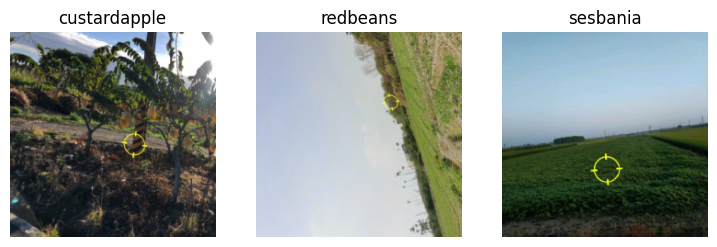

In [2]:
dls.show_batch(max_n=3)

In [ ]:
learn.show_results()

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

In [1]:
import timm 
from pathlib import Path 
from fastai.vision.all import * 

trn_path = Path('./md_train')
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64//16)
models = ['vit_large_patch16_224', 'convnext_large_in22k', 'swin_large_patch4_window7_224']
for model in models:
    model_save_name = model
    learn = vision_learner(dls, 
                    model, 
                    path='./tmp', 
                    cbs=[EarlyStoppingCallback(monitor='error_rate', min_delta=0.001, patience=3), 
                        SaveModelCallback(monitor='error_rate', min_delta=0.001, fname=model_save_name),
                        GradientAccumulation(64)],
                    metrics=error_rate,
                    ).to_fp16()
    learn.fine_tune(24, 0.01)
    torch.cuda.empty_cache()

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


epoch,train_loss,valid_loss,error_rate,time
0,1.473374,1.040190,0.320076,16:51


Better model found at epoch 0 with error_rate value: 0.32007595896720886.


epoch,train_loss,valid_loss,error_rate,time
0,0.950850,0.685639,0.209250,24:42
1,0.939334,0.658864,0.198414,25:03
2,0.721945,0.646602,0.189588,24:41
3,0.779104,0.656337,0.193610,24:48
4,0.902698,0.664222,0.197296,24:35
5,0.811782,0.693550,0.202882,24:23


Better model found at epoch 0 with error_rate value: 0.20925036072731018.
Better model found at epoch 1 with error_rate value: 0.19841358065605164.
Better model found at epoch 2 with error_rate value: 0.1895877569913864.
No improvement since epoch 2: early stopping


Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_large_22k_224.pth" to /home/tony/.cache/torch/hub/checkpoints/convnext_large_22k_224.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.240543,1.022143,0.308569,11:58


Better model found at epoch 0 with error_rate value: 0.3085688650608063.


epoch,train_loss,valid_loss,error_rate,time


SuggestedLRs(valley=0.02754228748381138)

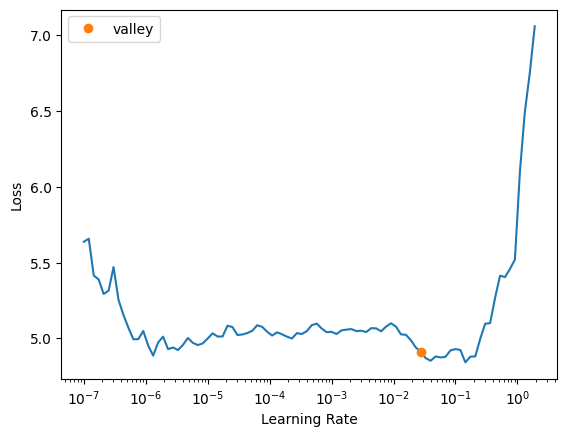

In [2]:
learn.lr_find()

SuggestedLRs(valley=0.0020892962347716093)

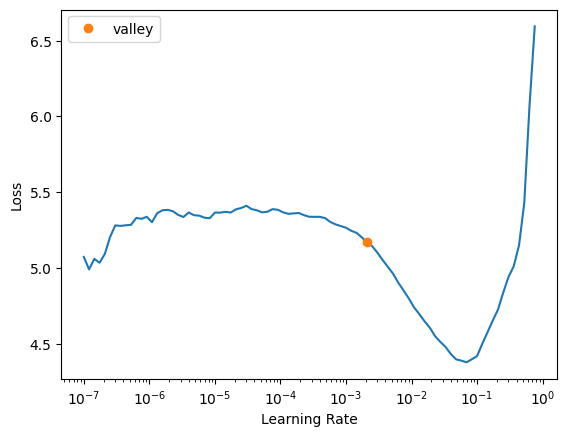

In [3]:
learn.lr_find()

In [3]:
dls.vocab


['asparagus', 'bambooshoots', 'betel', 'broccoli', 'cauliflower', 'chinesecabbage', 'chinesechives', 'custardapple', 'grape', 'greenhouse', 'greenonion', 'kale', 'lemon', 'lettuce', 'litchi', 'longan', 'loofah', 'mango', 'onion', 'others', 'papaya', 'passionfruit', 'pear', 'pennisetum', 'redbeans', 'roseapple', 'sesbania', 'soybeans', 'sunhemp', 'sweetpotato', 'taro', 'tea', 'waterbamboo']

In [1]:
import torch 
torch.zeros(1).cuda()

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([0.], device='cuda:0')

In [3]:
torch.cuda.get_device_name()

'NVIDIA GeForce RTX 3080 Ti'

In [2]:
torch.cuda.is_available()

True

## For ensemble

In [1]:
import timm 
# from fastkaggle import *
from pathlib import Path
# path = Path(r'C:\Users\user\Desktop\AI_CUP_2022-Crop_Image_Recognition')
from fastai.vision.all import *

tta_res = []

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
###
loc = torch.load('tobekilled/models/swin_large_patch4_window7_224_1.pth') 
trn_path = Path('md_train')
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=(224), min_scale=0.75))
learn = vision_learner(dls,'swin_large_patch4_window7_224',metrics=error_rate)
learn.load_state_dict(loc)

tst_files = get_image_files('md_test').sorted()
tst_dl = learn.dls.test_dl(tst_files)
tta_res.append(learn.tta(dl=tst_dl))

torch.cuda.empty_cache()
###


/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [3]:
###
loc = torch.load('tobekilled/models/swin_large_patch4_window7_224_2.pth') 
trn_path = Path('md_train')
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=(224), min_scale=0.75))
learn = vision_learner(dls,'swin_large_patch4_window7_224',metrics=error_rate)
learn.load_state_dict(loc)

tst_files = get_image_files('md_test').sorted()
tst_dl = learn.dls.test_dl(tst_files)
tta_res.append(learn.tta(dl=tst_dl))

torch.cuda.empty_cache()
###

In [4]:
###
loc = torch.load('tobekilled/models/swin_large_patch4_window7_224_3.pth') 
trn_path = Path('md_train')
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=(224), min_scale=0.75))
learn = vision_learner(dls,'swin_large_patch4_window7_224',metrics=error_rate)
learn.load_state_dict(loc)

tst_files = get_image_files('md_test').sorted()
tst_dl = learn.dls.test_dl(tst_files)
tta_res.append(learn.tta(dl=tst_dl))

torch.cuda.empty_cache()
###

In [2]:
###
loc = torch.load('tobekilled/models/swin_large_patch4_window7_224_4.pth') 
trn_path = Path('md_train')
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=(224), min_scale=0.75))
learn = vision_learner(dls,'swin_large_patch4_window7_224',metrics=error_rate)
learn.load_state_dict(loc)

tst_files = get_image_files('private_images').sorted()
tst_dl = learn.dls.test_dl(tst_files)
tta_res.append(learn.tta(dl=tst_dl))

torch.cuda.empty_cache()
###

/home/tony/anaconda3/envs/pikachu/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [5]:
###
loc = torch.load('tobekilled/models/swin_s3_samll.pth') 
trn_path = Path('md_train')
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=(224), min_scale=0.75))
learn = vision_learner(dls,'swin_s3_small_224',metrics=error_rate)
learn.load_state_dict(loc)

tst_files = get_image_files('md_test').sorted()
tst_dl = learn.dls.test_dl(tst_files)
tta_res.append(learn.tta(dl=tst_dl))

torch.cuda.empty_cache()
###

In [3]:
###
loc = torch.load('tobekilled/models/swin_base_patch4_window7_224_in22k.pth') 
trn_path = Path('md_train')
dls = ImageDataLoaders.from_folder(trn_path, seed=42, valid_pct=0.1, item_tfms=Resize(640), batch_tfms=aug_transforms(size=(224), min_scale=0.75))
learn = vision_learner(dls,'swin_base_patch4_window7_224_in22k',metrics=error_rate)
learn.load_state_dict(loc)

tst_files = get_image_files('private_images').sorted()
tst_dl = learn.dls.test_dl(tst_files)
tta_res.append(learn.tta(dl=tst_dl))

torch.cuda.empty_cache()
###

In [4]:
tta_prs = first(zip(*tta_res))
avg_pr = torch.stack(tta_prs).mean(0)
print(avg_pr.shape) 

idxs = avg_pr.argmax(dim=1)
vocab = np.array(dls.vocab)
ss = pd.read_csv('submission_example.csv')
ss['label'] = vocab[idxs]
ss.to_csv('subm.csv', index=False)

torch.Size([22308, 33])


0.9185549 swin_base_patch4_window7_224_in22k + swin_large_patch4_window7_224_4